In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
plt.style.use('ggplot')

In [2]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
stemer = PorterStemmer()

In [4]:
COLUMNS = ['news', 'Assassination','Hijacking','Kidnapping','Barricade Incident','Bombing/Explosion','Armed Assault','Unarmed Assault','Facility/Infrastructure Attack','Unknown']
input_path = '/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_MachineLearning/action_type_data.csv'
df = pd.read_csv(input_path, header=[0])
df.head(10)


,news,Assassination,Hijacking,Kidnapping,Barricade Incident,Bombing/Explosion,Armed Assault,Unarmed Assault,Facility/Infrastructure Attack,Unknown
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,False,False,False,False,False,True,False,False,False
1,The Commander Southern Command Lieutenant Gene...,False,False,False,False,False,False,False,False,True
2,Meanwhile the underground organization Manipur...,False,False,False,False,True,False,False,False,False
3,Islamic State IS in the latest issue of its on...,False,False,False,False,False,True,False,False,False
4,A senior Muttahida Qaumi Movement MQM worker i...,True,False,False,False,False,False,False,False,False
5,The ongoing construction work of an interstate...,False,False,False,False,False,False,False,True,False
6,Two civilians were injured when unidentified a...,False,False,False,False,False,True,False,False,False
7,More than a week after a woman Communist Party...,False,False,False,False,False,True,False,False,False
8,Three boys sustained injuries when a landmine ...,False,False,False,False,True,False,False,False,False
9,Unidentified militants shot dead a Frontier Co...,True,False,False,False,False,False,False,False,False


In [5]:
def model(df_action, action_type):
    
    counter = Counter(df_action[action_type].tolist())
    top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
    df_action = df_action[df_action[action_type].map(lambda x: x in top_10_varieties)]
    
    description_list = df_action['news'].tolist()
    varietal_list = [top_10_varieties[i] for i in df_action[action_type].tolist()]
    varietal_list = np.array(varietal_list)
    count_vect = CountVectorizer()
    x_train_counts = count_vect.fit_transform(description_list)
    tfidf_transformer = TfidfTransformer()
    x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
    train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)
    
    clf = MultinomialNB().fit(train_x, train_y)
    print("Naive bayes")
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))
    
    print("SVM")
    clf = SVC(kernel='linear').fit(train_x, train_y)
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))

cols_m1 = ['Assassination', 'Unarmed Assault', 'Facility/Infrastructure Attack', 'Unknown']
cols_m2 = ['Hijacking', 'Barricade Incident', 'Kidnapping']

def merge(data, cols):
    result = False
    for i in cols:
        result = data[i] or result
    return result


df['Other'] = df.apply(lambda row: merge(row, cols_m1), axis=1)
df['Kidnapping'] = df.apply(lambda row: merge(row, cols_m2), axis=1)

REDUCED_COLS = ['news', 'Kidnapping','Bombing/Explosion','Armed Assault', 'Other']
df = df.loc[:, REDUCED_COLS]
df.head(10)
    

,news,Kidnapping,Bombing/Explosion,Armed Assault,Other
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,False,False,True,False
1,The Commander Southern Command Lieutenant Gene...,False,False,False,True
2,Meanwhile the underground organization Manipur...,False,True,False,False
3,Islamic State IS in the latest issue of its on...,False,False,True,False
4,A senior Muttahida Qaumi Movement MQM worker i...,False,False,False,True
5,The ongoing construction work of an interstate...,False,False,False,True
6,Two civilians were injured when unidentified a...,False,False,True,False
7,More than a week after a woman Communist Party...,False,False,True,False
8,Three boys sustained injuries when a landmine ...,False,True,False,False
9,Unidentified militants shot dead a Frontier Co...,False,False,False,True


# Kidnapping

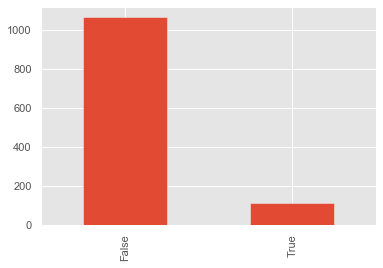

In [6]:
fig, ax = plt.subplots()
df['Kidnapping'].value_counts().plot(ax=ax, kind='bar')

In [7]:
model(df, 'Kidnapping')

Naive bayes
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       319
           1       0.00      0.00      0.00        32

    accuracy                           0.91       351
   macro avg       0.45      0.50      0.48       351
weighted avg       0.83      0.91      0.87       351

SVM


/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       319
           1       0.84      0.50      0.63        32

    accuracy                           0.95       351
   macro avg       0.90      0.75      0.80       351
weighted avg       0.94      0.95      0.94       351



# Bombing/Explosion

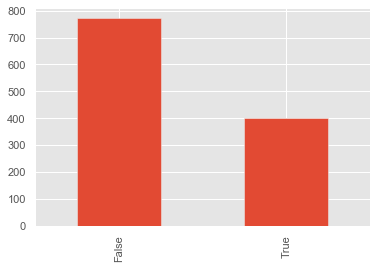

In [8]:
fig, ax = plt.subplots()
df['Bombing/Explosion'].value_counts().plot(ax=ax, kind='bar')

In [9]:
model(df, 'Bombing/Explosion')

Naive bayes
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       236
           1       1.00      0.24      0.39       115

    accuracy                           0.75       351
   macro avg       0.87      0.62      0.62       351
weighted avg       0.82      0.75      0.70       351

SVM
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       236
           1       0.94      0.81      0.87       115

    accuracy                           0.92       351
   macro avg       0.93      0.89      0.91       351
weighted avg       0.92      0.92      0.92       351



# Armed Assault

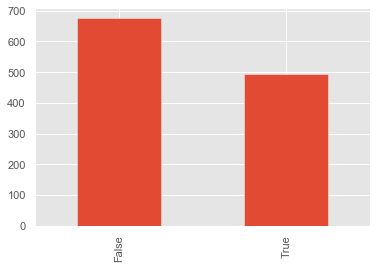

In [10]:
fig, ax = plt.subplots()
df['Armed Assault'].value_counts().plot(ax=ax, kind='bar')

In [11]:
model(df, 'Armed Assault')

Naive bayes
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       205
           1       0.90      0.53      0.66       146

    accuracy                           0.78       351
   macro avg       0.82      0.74      0.75       351
weighted avg       0.80      0.78      0.76       351

SVM
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       205
           1       0.83      0.82      0.82       146

    accuracy                           0.85       351
   macro avg       0.85      0.85      0.85       351
weighted avg       0.85      0.85      0.85       351



# Other

False    853
True     317
Name: Other, dtype: int64


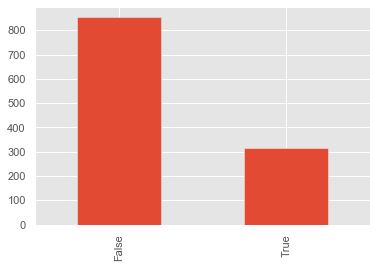

In [12]:
fig, ax = plt.subplots()
print(df['Other'].value_counts())
df['Other'].value_counts().plot(ax=ax, kind='bar')

In [13]:
model(df, 'Other')

Naive bayes
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       265
           1       0.00      0.00      0.00        86

    accuracy                           0.75       351
   macro avg       0.38      0.50      0.43       351
weighted avg       0.57      0.75      0.65       351

SVM


/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       265
           1       0.62      0.30      0.41        86

    accuracy                           0.78       351
   macro avg       0.71      0.62      0.64       351
weighted avg       0.76      0.78      0.75       351

